# ADT PROJECT
# ADVANCED DETECTION & PREVENTION FOR SQL INJECTION
# SQL IMMUNITES

## <i> 1. Importing the dependencies

In [1]:
# Importing necessary data manipulation tools

import os # Importing os to access the contents of a system folder.
import numpy as np  # To perform numerical operations on matrices and arrays.
import pandas as pd  # To handle dataframes and retrieve data from files.
import random # To randomize things
import math # For calculation purposes
import joblib # To save model weights
import string

In [2]:
# Importing the required data visualization tools

import seaborn as sns # To interpret and visualise data in the form of |graphs and charts.
import matplotlib.pyplot as plt # For advanced visualisation of data with extra customization

In [4]:
#pip install xgboost

In [7]:
# Importing the necessary Machine Learning models from sklearn library

import xgboost as xgb # XGBoost Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.svm import SVC # Support Vector Machine 
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes Classifier

In [9]:
# Importing necessary tools for pre-processing and post-processing data

import nltk # Importing the Natural Language Tool Kit
from nltk.tokenize import word_tokenize # To tokenize words
from nltk.corpus import stopwords # Stop words in english from natural language tool kit
from sklearn.model_selection import train_test_split # Train-test-split tool to split data
from sklearn.metrics import confusion_matrix # Confusion matrix to calculate specificity & sensitivity
from sklearn.metrics import accuracy_score, f1_score # Tools to calculate metrics
from sklearn.metrics import roc_curve, auc # To plot roc curve and auc 
from sklearn.model_selection import learning_curve # To plot learning curve
from sklearn.model_selection import validation_curve # To plot validation curve
from sklearn.feature_extraction.text import CountVectorizer # To transform text data into feature vectors.

In [11]:
#pip install tensorflow

In [13]:
# Importing the necessary deep learning packages

import tensorflow as tf # tensorflow to employ deep learning techniques
from tensorflow.keras import models, layers # models, layers to build our own neural networks
from tensorflow import keras # keras for pre-processing functions
from tensorflow.python.keras.layers import Dense, Flatten # Importing the dense, flatten layers
from tensorflow.python.keras.layers import Embedding, Dropout # Importing the embedding, dropout layers
from tensorflow.keras.preprocessing.text import Tokenizer # Importing the Tokenizer for tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences # Importing pad_sequences module for padding sequences
from tensorflow.keras.models import Sequential, model_from_json # Importing the Sequential model
from tensorflow.keras import optimizers # Importing the optimizers
from tensorflow.keras import backend as K # To clear sessions
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.utils import to_categorical # to convert text values to categorical values

In [15]:
# Suppressing any non-critical warnings to keep output clean

import warnings # Importing the warnings module
warnings.filterwarnings('ignore') # Ignoring the warnings

In [21]:
pip install Crypto

Note: you may need to restart the kernel to use updated packages.


In [23]:
# For encryption of data
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64

ModuleNotFoundError: No module named 'Crypto'

## <i> 2. Reading the data

In [8]:
# Getting the data from the sqli dataset into a dataframe
sql_df = pd.read_csv("C:\Users\USER\OneDrive\Desktop\ADT\Project\archive (1)\sql_injection_dataset.csv", encoding='utf-16')
print(sql_df)

                                                Sentence  Label
0                                                    NaN      1
1                          " or pg_sleep ( __TIME__ ) --      1
2      create user name identified by pass123 tempora...      1
3                                                    %29      1
4      ' AND 1 = utl_inaddr.get_host_address  (  (  S...      1
...                                                  ...    ...
33756                                             syrett      0
33757                                   arrechea bellveh      0
33758                                               1664      0
33759                                           almaluez      0
33760                                          f6lo40r06      0

[33761 rows x 2 columns]


In [9]:
# Printing the first five rows and last five rows of the data frame 
print(sql_df.head())
print(sql_df.tail())

                                            Sentence  Label
0                                                NaN      1
1                      " or pg_sleep ( __TIME__ ) --      1
2  create user name identified by pass123 tempora...      1
3                                                %29      1
4  ' AND 1 = utl_inaddr.get_host_address  (  (  S...      1
               Sentence  Label
33756            syrett      0
33757  arrechea bellveh      0
33758              1664      0
33759          almaluez      0
33760         f6lo40r06      0


In [10]:
# Checking the nnumber of rows and columns.
sql_df.shape

(33761, 2)

In [11]:
# Getting the data types of the features in the data set.
sql_df.dtypes

Sentence    object
Label        int64
dtype: object

In [12]:
# Getting the statistical measures for the data frame.
sql_df.describe()

,Label
count,33761.000000
mean,0.339326
std,0.473488
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## <i> 3. Pre-Processing the data

In [13]:
# Check for null values in the 'Sentence' column and print the result
values = sql_df['Sentence']
null_values = sql_df['Sentence'].isnull()
for i in range(len(values)):
    if null_values[i]==True:
        print(sql_df['Sentence'][i])

nan
nan
nan
nan


In [14]:
# Checking for the missing values in the data frame.
sql_df.isnull().sum()

Sentence    4
Label       0
dtype: int64

In [15]:
# As Null Values are found we are dropping them. 
sql_df = sql_df.dropna(subset=['Sentence']) # Drop rows where 'Sentence' column has null values
print(sql_df) # Print the cleaned DataFrame

                                                Sentence  Label
1                          " or pg_sleep ( __TIME__ ) --      1
2      create user name identified by pass123 tempora...      1
3                                                    %29      1
4      ' AND 1 = utl_inaddr.get_host_address  (  (  S...      1
5       select * from users where id = '1' or @ @1 = ...      1
...                                                  ...    ...
33756                                             syrett      0
33757                                   arrechea bellveh      0
33758                                               1664      0
33759                                           almaluez      0
33760                                          f6lo40r06      0

[33757 rows x 2 columns]


In [16]:
#Re-checking for the missing values in the data frame.
sql_df.isnull().sum() # To assure null values are eliminated.

Sentence    0
Label       0
dtype: int64

In [17]:
# Getting the latest number of rows and columns of data frame.
sql_df.shape

(33757, 2)

In [18]:
# Checking for the duplicates in the data frame.
sql_df.duplicated().sum()

30

In [19]:
# Check for duplicate values in the data frame and print the result.
df_values = sql_df
duplicate_values = sql_df.duplicated()
print(df_values[duplicate_values].to_string(max_rows=None))

                                                 Sentence  Label
3952           1 or benchmark ( 10000000,MD5 ( 1  )  )  #      1
3954                        " or pg_sleep ( __TIME__ ) --      1
3955                    1  )  )   or sleep ( __TIME__ ) #      1
3957   1  )  )   or benchmark ( 10000000,MD5 ( 1  )  )  #      1
3958                     " )  or pg_sleep ( __TIME__ ) --      1
3960                1  )  )   or pg_sleep ( __TIME__ ) --      1
3961                        1 or pg_sleep ( __TIME__ ) --      1
3964   "  )  )   or benchmark ( 10000000,MD5 ( 1  )  )  #      1
3965                benchmark ( 10000000,MD5 ( 1  )  )  #      1
3966             "  )  )  ;waitfor delay '0:0:__TIME__'--      1
3967                                        # from wapiti      1
3969           " or benchmark ( 10000000,MD5 ( 1  )  )  #      1
3970        1 )  or benchmark ( 10000000,MD5 ( 1  )  )  #      1
3973                         1 )  or sleep ( __TIME__ ) #      1
3974                     

In [20]:
# As duplicates are found we're dropping them.
sql_df=sql_df.drop_duplicates() # Keeps the first occurence of each duplicate and deletes the rest.
print(sql_df) # Print the cleaned DataFrame

                                                Sentence  Label
1                          " or pg_sleep ( __TIME__ ) --      1
2      create user name identified by pass123 tempora...      1
3                                                    %29      1
4      ' AND 1 = utl_inaddr.get_host_address  (  (  S...      1
5       select * from users where id = '1' or @ @1 = ...      1
...                                                  ...    ...
33756                                             syrett      0
33757                                   arrechea bellveh      0
33758                                               1664      0
33759                                           almaluez      0
33760                                          f6lo40r06      0

[33727 rows x 2 columns]


In [21]:
# Re-checking for the duplicates in the data frame.
sql_df.duplicated().sum()

0

In [22]:
# Getting the latest number of rows and columns of data frame.
sql_df.shape

(33727, 2)

In [23]:
# Getting the updated statistis of the data.
sql_df.describe()

,Label
count,33727.000000
mean,0.338720
std,0.473281
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## <i> 4. Visualising the data

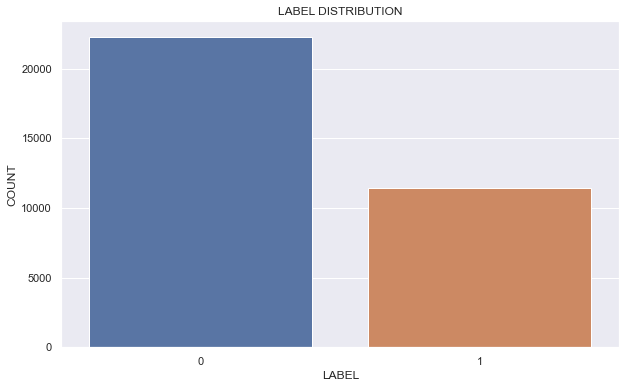

In [24]:
# Plotting Distributions.
# Plotting a bar chart of the label column.
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(sql_df['Label'])
plt.title('LABEL DISTRIBUTION')
plt.xlabel('LABEL')
plt.ylabel('COUNT')
plt.show()

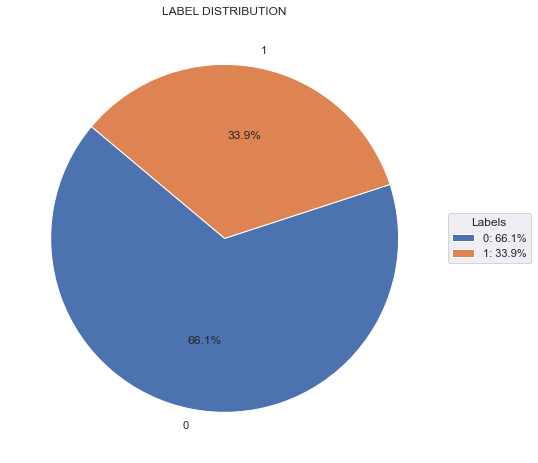

In [25]:
# Plotting a pie chart of Label column to understand the value distribution.
sns.set()
label_counts = sql_df['Label'].value_counts()
label_percentages = label_counts / label_counts.sum() * 100
plt.figure(figsize=(10, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend([f'{label}: {percentage:.1f}%' for label, percentage in zip(label_counts.index, label_percentages)], 
           title="Labels", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('LABEL DISTRIBUTION')
plt.show()

## <i> 5. Replicating the Existing Approach with Cleansed Data

### a. Data Transformation for Model Predictions

In [26]:
nltk.download('stopwords') # Downloading the stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Seperating the data and label columns into X and y
X = sql_df['Sentence'] # Getting the sentences as x data
y = sql_df['Label'] # Getting the labels as y data

In [28]:
# Transforming the sql queries text into a series of matrix tokens.
# Also filtering out stopwords to improve accuracy in predictions.
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

In [29]:
# Performing train test split on dataset
# To seperate values into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26981, 10319)
(26981,)
(6746, 10319)
(6746,)


### b. Helper Functions

In [30]:
# Function to run different machine learning classifiers on our dataset.
def ml_classifier_runner(model, X_train, y_train, X_test, model_name):
    
    # Fitting the specific machine learning model to the training data
    model.fit(X_train, y_train)
    
    # Predicting the y values based on the passed x test values to the model
    y_pred = model.predict(X_test)
    
    # Save the model to a .pkl file
    joblib_file = f"{model_name}_model.pkl"
    joblib.dump(model, joblib_file)
    
    # Returning the predicted values to store them model-wise
    return y_pred

In [31]:
# Function to get different stats based on the machine learning classifier predictions.
def ml_stats_helper(y_test, y_pred):
    # Getting the confusion matrix values
    confusion = confusion_matrix(y_test, y_pred)

    # Seperating True Positives, True Negatives, False Positives & False Negatives
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # Getting values of different stats based on the values of TP, TN, FP & FN
    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    Precision = TP / float(TP + FP)
    Recall = TP / float(TP + FN)
    F1 = 2*((Precision*Recall)/(Precision+Recall))
    
    # Returning all the stat values to store them model-wise.
    return [accuracy_score(y_pred, y_test),f1_score(y_pred, y_test), sensitivity, specificity, Precision, Recall, F1]

In [32]:
# Function to print calculated stats for each of the machine learning classifiers.
def ml_stats_printer(model_name, model_stats_list ):
    print(f"Accuracy of {model_name} on test set : {model_stats_list[0]}")
    print(f"F1 Score of {model_name} on test set : {model_stats_list[1]}")
    print("sensitivity value of ",model_name," =",model_stats_list[2])
    print("specificity value of ",model_name," =",model_stats_list[3])
    print ("Precision value of ",model_name," =",model_stats_list[4])
    print ("Recall value of ",model_name," =", model_stats_list[5])
    print ("FMeasure value of ",model_name," =", model_stats_list[6])
    print("\n")

In [33]:
# Function to plot confusion matrix for each of the models
def cf_matrix_plotter(model_name, y_test, model_preds):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, model_preds)

    # List of colors
    colors = [plt.cm.Blues, plt.cm.Greens, plt.cm.Reds, plt.cm.Purples, plt.cm.Oranges]

    # Randomly select an element from the list
    random_choice = random.choice(colors)
    cmap_val = random_choice
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap_val)
    plt.title(f'Confusion Matrix ~ {model_name}')
    plt.colorbar()

    # Add tick marks and labels
    classes = ['Class 0', 'Class 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

In [34]:
# Function to plot ROC Curve for each of the models
def roc_plotter(model_name, y_test, model_preds):
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, model_preds)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve ~ {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [35]:
def ml_model_loader(X_test, model_name):
    # Load the model from the .pkl file
    joblib_file = f"{model_name}_model.pkl"
    model = joblib.load(joblib_file)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Returning the predicted values to store them model-wise
    return y_pred

### c. Data Storage for Models

In [36]:
# model_names stores the list of the names of ML Classifiers that are going to be used
model_names = {'logreg':'Logistic Regression',
               'adaboo':'AdaBoostClassifier',
               'ranfor':'RandomForestClassifier',
               'navbay':'GaussianNB',
               'xgboos':'XGBClassifier',
              }

# model_dict stores the list of machine learning clasisfiers.
model_dict = {'logreg':[LogisticRegression()],
              'adaboo':[AdaBoostClassifier(n_estimators=100)],
              'ranfor':[RandomForestClassifier(n_estimators=100)],
              'navbay':[GaussianNB()],
              'xgboos':[xgb.XGBClassifier(n_estimators=100)],
              }

# model_preds stores the list of y_pred values (predictions performed on X_test) for each of the models
model_preds = { 
              }

# model_stats stores the list of all the stats generated for each of the models like accuracy, f1 score etc
model_stats = {  
              }

In [37]:
# Running the helper funcions for each of the models
# To perform model training and to store predictions and stats
for i in model_names.keys():
    # For the first time run to save weights in pickle file
    # model_preds[i] = ml_classifier_runner(model_dict[i][0], X_train, y_train, X_test, model_names[i])
    
    # For further runs to load weights from pickle files
    model_preds[i] = ml_model_loader(X_test, model_names[i])
    
    # To get the stats of each model
    model_stats[i] = ml_stats_helper(y_test, model_preds[i])

### d. Results

In [38]:
# Running the helper funcions to print predictions and stats of the models
for i in model_names.keys():
    ml_stats_printer(model_names[i], model_stats[i])

Accuracy of Logistic Regression on test set : 0.9617551141417137
F1 Score of Logistic Regression on test set : 0.9418132611637348
sensitivity value of  Logistic Regression  = 0.8923076923076924
specificity value of  Logistic Regression  = 0.9986382206082615
Precision value of  Logistic Regression  = 0.997134670487106
Recall value of  Logistic Regression  = 0.8923076923076924
FMeasure value of  Logistic Regression  = 0.9418132611637348


Accuracy of AdaBoostClassifier on test set : 0.9623480581085088
F1 Score of AdaBoostClassifier on test set : 0.9428185502026115
sensitivity value of  AdaBoostClassifier  = 0.8948717948717949
specificity value of  AdaBoostClassifier  = 0.9981842941443486
Precision value of  AdaBoostClassifier  = 0.9961941008563273
Recall value of  AdaBoostClassifier  = 0.8948717948717949
FMeasure value of  AdaBoostClassifier  = 0.9428185502026115


Accuracy of RandomForestClassifier on test set : 0.9632374740587014
F1 Score of RandomForestClassifier on test set : 0.94464

### e. Graphs

Confusion matrix for Logistic Regression model


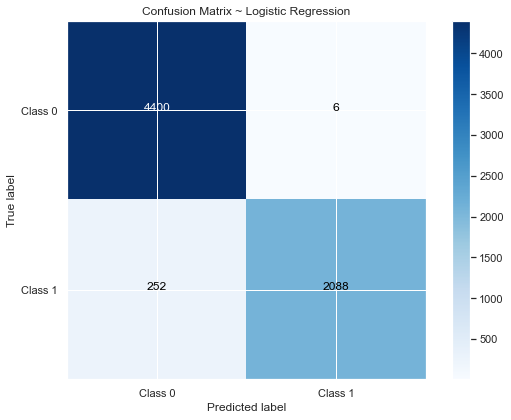

In [39]:
# CONFUSION MATRIX

# Running the helper funcion to print confusion matrix for each of the models
print(f"Confusion matrix for {model_names['logreg']} model")
cf_matrix_plotter(model_names['logreg'], y_test, model_preds['logreg'])

Confusion matrix for AdaBoostClassifier model


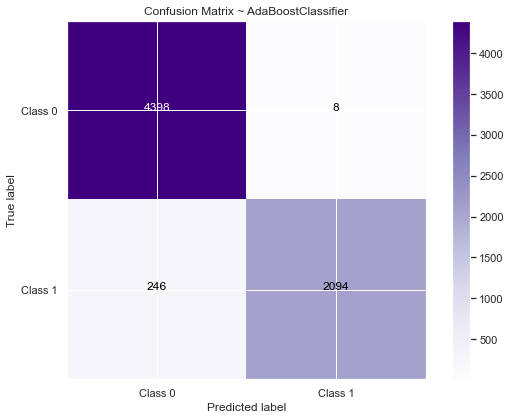

In [40]:
# Running the helper funcion to print confusion matrix for each of the models
print(f"Confusion matrix for {model_names['adaboo']} model")
cf_matrix_plotter(model_names['adaboo'], y_test, model_preds['adaboo'])

Confusion matrix for RandomForestClassifier model


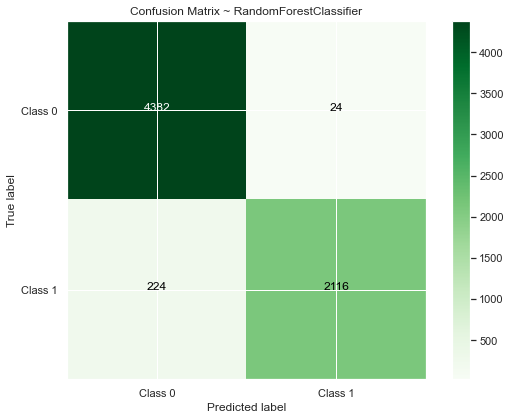

In [41]:
# Running the helper funcion to print confusion matrix for each of the models
print(f"Confusion matrix for {model_names['ranfor']} model")
cf_matrix_plotter(model_names['ranfor'], y_test, model_preds['ranfor'])

Confusion matrix for GaussianNB model


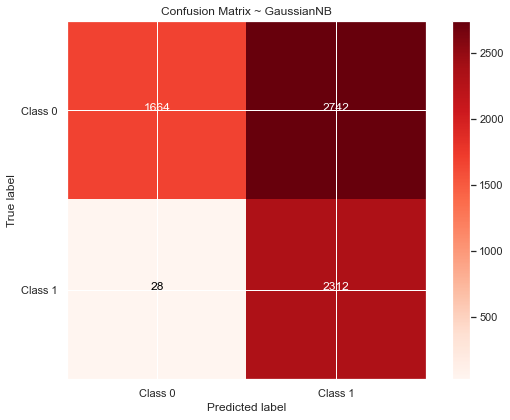

In [42]:
# Running the helper funcion to print confusion matrix for each of the models
print(f"Confusion matrix for {model_names['navbay']} model")
cf_matrix_plotter(model_names['navbay'], y_test, model_preds['navbay'])

Confusion matrix for XGBClassifier model


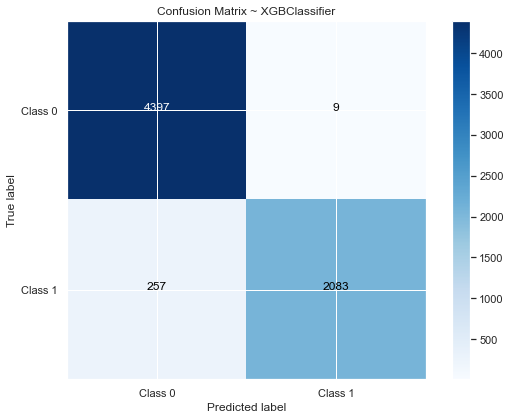

In [43]:
# Running the helper funcion to print confusion matrix for each of the models
print(f"Confusion matrix for {model_names['xgboos']} model")
cf_matrix_plotter(model_names['xgboos'], y_test, model_preds['xgboos'])

ROC Curve for Logistic Regression model


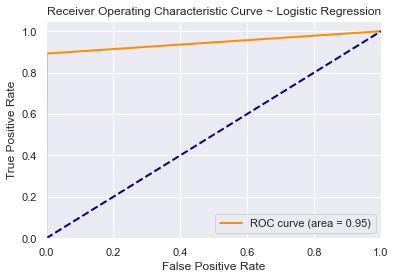

In [44]:
# ROC CURVE
print(f"ROC Curve for {model_names['logreg']} model")
roc_plotter(model_names['logreg'], y_test, model_preds['logreg'])

ROC Curve for AdaBoostClassifier model


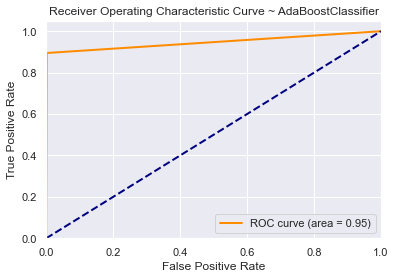

In [45]:
print(f"ROC Curve for {model_names['adaboo']} model")
roc_plotter(model_names['adaboo'], y_test, model_preds['adaboo'])

ROC Curve for RandomForestClassifier model


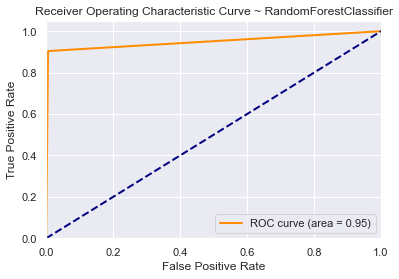

In [46]:
print(f"ROC Curve for {model_names['ranfor']} model")
roc_plotter(model_names['ranfor'], y_test, model_preds['ranfor'])

ROC Curve for GaussianNB model


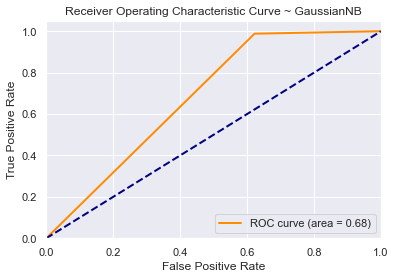

In [47]:
print(f"ROC Curve for {model_names['navbay']} model")
roc_plotter(model_names['navbay'], y_test, model_preds['navbay'])

ROC Curve for XGBClassifier model


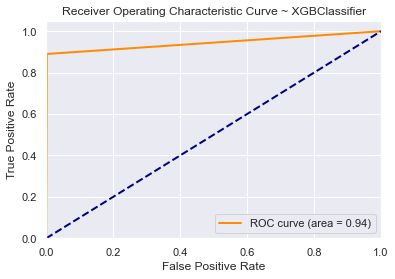

In [48]:
print(f"ROC Curve for {model_names['xgboos']} model")
roc_plotter(model_names['xgboos'], y_test, model_preds['xgboos'])

## <i> 6. Ensemble Model

### Improvement in accuracy

In [49]:
# Ensemble of models which got best sensitivity, specificity and accuracy values 
y_test_actual=y_test
y_best_specificity=model_preds['logreg']
y_best_sensitivity=model_preds['navbay']
y_best_accuracy=model_preds['ranfor']

In [50]:
# Ensemble prediction
y_pred_ensemble = y_best_specificity + y_best_sensitivity + y_best_accuracy
for i in range(len(y_pred_ensemble)):
    y_pred_ensemble[i]=1 if y_pred_ensemble[i]>1.5 else 0        

In [51]:
# Ensemble accuracy
print(f"Accuracy of Ensemble of Logistic Regression, RandomForest & NaiveBayes on test set : {accuracy_score(y_test_actual, y_pred_ensemble)}")

Accuracy of Ensemble of Logistic Regression, RandomForest & NaiveBayes on test set : 0.965609249925882


## <i> 7. Deep Learning Models

### Improvement in technology - CNNs on Text Data using 1D Convolutions

### Data Transformation for Model Predictions (Vectorization)

In [105]:
# Seperating the data and label columns into X and y
X = sql_df['Sentence'] # Getting the sentences as x data
y = sql_df['Label'] # Getting the labels as y data

In [106]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Splitting the available data into training and testing data seperately in 80%-20%
# train_data, train_labels will have values for TRAINING data.
# data_validation_set, labels_validation_set will have values for VALIDATING data.
train_data, data_validation_set, train_labels, labels_validation_set = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y)

In [62]:
# Splitting the TESTING data into TESTING and VALIDATING data seperately in 50%-50%
# i.e so that final ratio would be TRAINING (80%), VALIDATING (10%), TESTING (10%)
# validation_images, validation_labels will have values for VALIDATING data.
# test_images, test_labels will have values for TESTING data.
validation_data, test_data, validation_labels, test_labels = train_test_split(
    data_validation_set, labels_validation_set, test_size=0.5,random_state=50,stratify=labels_validation_set)

In [63]:
# Printing the shapes of Train, Test and Validation datasets
print("Train Data shape ",train_data.shape)
print("Train Labels shape ",train_labels.shape)
print("Validation Data shape ",validation_data.shape)
print("Validation Labels shape ",validation_labels.shape)
print("Test Data shape ",test_data.shape)
print("Test Labels shape ",test_labels.shape)

Train Data shape  (26981, 10319)
Train Labels shape  (26981,)
Validation Data shape  (3373, 10319)
Validation Labels shape  (3373,)
Test Data shape  (3373, 10319)
Test Labels shape  (3373,)


In [64]:
train_data = train_data.reshape(-1, 1, 10319)
validation_data = validation_data.reshape(-1, 1, 10319)
test_data = test_data.reshape(-1, 1, 10319)

In [65]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,10319)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             330240    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 331,329
Trainable params: 331,329
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [68]:
history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=50, batch_size=128)

Epoch 1/50
211/211 [==============================] - 7s 16ms/step - loss: 0.2963 - accuracy: 0.9464 - val_loss: 0.1266 - val_accuracy: 0.9600
Epoch 2/50
211/211 [==============================] - 3s 12ms/step - loss: 0.1037 - accuracy: 0.9659 - val_loss: 0.1071 - val_accuracy: 0.9692
Epoch 3/50
211/211 [==============================] - 3s 12ms/step - loss: 0.0692 - accuracy: 0.9825 - val_loss: 0.1030 - val_accuracy: 0.9698
Epoch 4/50
211/211 [==============================] - 3s 12ms/step - loss: 0.0609 - accuracy: 0.9864 - val_loss: 0.1063 - val_accuracy: 0.9686
Epoch 5/50
211/211 [==============================] - 3s 12ms/step - loss: 0.0594 - accuracy: 0.9867 - val_loss: 0.1054 - val_accuracy: 0.9698
Epoch 6/50
211/211 [==============================] - 3s 13ms/step - loss: 0.0585 - accuracy: 0.9866 - val_loss: 0.1054 - val_accuracy: 0.9706
Epoch 7/50
211/211 [==============================] - 3s 13ms/step - loss: 0.0587 - accuracy: 0.9864 - val_loss: 0.1103 - val_accuracy: 0.9692

In [69]:
y_pred = model.predict(test_data).flatten()
# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]

y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, test_labels)}")
print(f"F1 Score of CNN on test set : {f1_score(y_pred, test_labels)}")

106/106 [==============================] - 1s 6ms/step
Accuracy of CNN on test set : 0.9635339460420991
F1 Score of CNN on test set : 0.9442176870748299


**ENCRYPTION ALGORITHMS**

**ADVANCED ENCRYPTION STANDARD**

**HELPER FUNCTIONS**

In [52]:
def encrypt(data, key, key_length):
    # Ensure the key is 32 bytes for AES-256
    if len(key) < key_length:
        key = key.ljust(key_length)[:key_length]
    elif len(key) > key_length:
        key = key[:key_length]
    
    cipher = AES.new(key.encode('utf-8'), AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data.encode('utf-8'), AES.block_size))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv + ct

In [53]:
def decrypt(encrypted_data, key, key_length):
    # Ensure the key is 32 bytes for AES-256
    if len(key) < key_length:
        key = key.ljust(32)[:key_length]
    elif len(key) > key_length:
        key = key[:key_length]

    iv = base64.b64decode(encrypted_data[:24])
    ct = base64.b64decode(encrypted_data[24:])
    cipher = AES.new(key.encode('utf-8'), AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), AES.block_size)
    return pt.decode('utf-8')

**SAMPLE ENCRYPTION**

In [54]:
# Sample input for key and data
# You should use 32 byte key for AES 256 encryption
# You should use 16 byte key for AES 128 encryption

key_length = 16
key = 'This is a key123'  # 32 - byte : This is a very secure key for AES-256 encryption  
data = "Sensitive data"

In [55]:
# How data looks to the hacker (without encryption)
print(f"This is key: {key}",f"This is data: {data}",sep="\n")

This is key: This is a key123
This is data: Sensitive data


In [56]:
# Encrypting the data 
encrypted_data = encrypt(data, key, key_length)

# How data looks to the hacker (with encryption)
print(f"Encrypted: {encrypted_data}")

Encrypted: Z/x+uLhkcb/JyXOhjrG+SQ==ciJ8t6niN+UuA2IwqTW9mA==


In [57]:
# Decrypting the data
decrypted_data = decrypt(encrypted_data, key, key_length)

# How data looks to the admin (after decryption)
print(f"Decrypted: {decrypted_data}")

Decrypted: Sensitive data


**TESTING MODULE**

In [75]:
def ml_model_predicter(X_test):
    # logreg
    # Load the model from the .pkl file
    joblib_file = f"{model_names['logreg']}_model.pkl"
    model = joblib.load(joblib_file)
    y_pred_logreg = model.predict(X_test)
    
    # ranfor
    joblib_file = f"{model_names['ranfor']}_model.pkl"
    model = joblib.load(joblib_file)
    y_pred_ranfor = model.predict(X_test)
    
    # navbay
    joblib_file = f"{model_names['navbay']}_model.pkl"
    model = joblib.load(joblib_file)
    y_pred_navbay = model.predict(X_test)
    
    y_pred_average = y_pred_logreg + y_pred_ranfor + y_pred_navbay
    y_pred_ensemble = 1 if y_pred_average > 1.5 else 0       
    # Returning the predicted values to store them model-wise
    
    if y_pred_ensemble==1: 
        print("SQL INJECTION THREAT")
        return 1
    else: 
        print("Genuine Password")
        return 0    

In [76]:
def randomizer(user_name, user_password, key_length):
    # Combine characters from user_name and password
    combined_chars = user_name + user_password

    # Generate a random string of length key_length
    random_string = ''.join(random.choices(combined_chars, k=key_length))

    print("Your Key (admin privileges):", random_string)
    return random_string

In [77]:
def encryptor(prediction_value, user_name, user_password, key_length):
    if prediction_value==1:
        print("Threat possibility, encrypting the password")
        filter_key = randomizer(user_name, user_password, key_length)
        user_password = encrypt(user_password, filter_key, key_length)
        print(f"Newly encrypted password: {user_password}")
    else:
        print("No threat so proceeding with password storage")
        
    return user_password

In [78]:
def input_filter(user_password, key_length):    
    ex_df = sql_df['Sentence'] # Getting the sentences as ex data
    new_df = pd.DataFrame({'Sentence':[user_password]})
    new_df = new_df['Sentence']
    combined_df = pd.concat([ex_df, new_df], ignore_index=True)
    
    # Transforming the password text into a seradmin
    prediction = ml_model_predicter([vectorized_values[-1]])
    encryptor(prediction, user_name, user_password, key_length)
    return prediction

In [ ]:
# INPUT FORM
# Get password input from user
print("Enter your username: ")
user_name = input()
print("Enter your password: ")
user_password = input()

Enter your username: 


In [82]:
# Set key_length
key_length = 32
input_filter(user_password, key_length)

SQL INJECTION THREAT
Threat possibility, encrypting the password
Your Key (admin privileges): ShonCRRETKEaAhMha;CASSKnRS SORor
Newly encrypted password: 09dj1DEO560oxxWqJusAWQ==CCa4501pwBno26OvKlnhi2BIMk9DgGUHwf7kjXHvJ1TIIjRF4X1UDWRYrHJ/dPYv


1